## Importing and Understanding the Dataset

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
file = 'laptops.csv'

In [4]:
df = pd.read_csv(file)

In [5]:
df = pd.read_csv(file, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [6]:
headers = ["Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", "Screen_Size_inch", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg", "Price"]
df.columns = headers
df.head(10)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016
6,HP,3,Full HD,3,1,5,39.624,1.6,8,256,2.1,1117
7,Acer,3,IPS Panel,2,1,5,38.1,1.6,4,256,2.2,866
8,Dell,3,Full HD,1,1,5,39.624,2.5,4,256,2.3,812
9,Acer,3,IPS Panel,3,1,7,38.1,1.8,8,256,2.2,1068


In [7]:
df = df.replace('?',np.nan)

In [8]:
df.dtypes

Manufacturer         object
Category              int64
Screen               object
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch     object
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_kg            object
Price                 int64
dtype: object

In [9]:
df.describe(include='all')

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238,238.000000,238,238.000000,238.000000,238.000000,234,238.000000,238.000000,238.000000,233,238.000000
unique,11,NaN,2,NaN,NaN,NaN,9,NaN,NaN,NaN,77,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,39.624,NaN,NaN,NaN,2.2,NaN
freq,71,NaN,161,NaN,NaN,NaN,89,NaN,NaN,NaN,21,NaN
mean,NaN,3.205882,NaN,2.151261,1.058824,5.630252,NaN,2.360084,7.882353,245.781513,NaN,1462.344538
std,NaN,0.776533,NaN,0.638282,0.235790,1.241787,NaN,0.411393,2.482603,34.765316,NaN,574.607699
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,NaN,1.200000,4.000000,128.000000,NaN,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.000000,8.000000,256.000000,NaN,1066.500000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.500000,8.000000,256.000000,NaN,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,NaN,2.700000,8.000000,256.000000,NaN,1777.000000


In [10]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


## Data wrangling

In [24]:
df = pd.read_csv('laptops_wrangling.csv', header=0)

In [25]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [27]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


### Evaluate the dataset for missing data

In [39]:
#create a df with missing values (true or false). Loop for each column print the number of missing values
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 


   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    23

### Replace with mean

In [41]:
weight_kg_mean = df['Weight_kg'].mean()
print(weight_kg_mean)

df['Weight_kg'] = df['Weight_kg'].fillna(df['Weight_kg'].mean())
df.head()

1.8622317596566522


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


### Replace with the most frequent value

In [46]:
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"] = df["Screen_Size_cm"].replace(np.nan, common_screen_size)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


### Fixing the data types

In [47]:
df.Weight_kg = df.Weight_kg.astype('float')
df.Screen_Size_cm = df.Screen_Size_cm.astype('float')

df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

### Data Standardization

In [53]:
df['Weight_kg'] = df['Weight_kg'] * 2.205
df.rename(columns={"Weight_kg": "Weight_pounds"}, inplace=True)

df['Screen_Size_cm'] = df['Screen_Size_cm'] / 2.54
df.rename(columns={"Screen_Size_cm": "Screen_Size_inch"}, inplace=True)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,0.336351,1.6,8,256,83.399405,978
1,1,Dell,3,Full HD,1,1,3,0.374754,2.0,4,256,114.674182,634
2,2,Dell,3,Full HD,1,1,7,0.374754,2.7,8,256,114.674182,946
3,3,Dell,4,IPS Panel,2,1,5,0.319515,1.6,8,128,63.592046,1244
4,4,HP,4,Full HD,2,1,7,0.374754,1.8,8,256,99.558040,837


### Data Normalization


In [54]:
#Simple Featue Scaling
df['CPU_frequency'] = df['CPU_frequency'] / df['CPU_frequency'].max()

### Binning

In [57]:
bins = np.linspace(min(df['Price']),max(df['Price']),4)
attributes = ['Low','Medium','High']
df['Price-binned'] = pd.cut(df['Price'],bins,labels=attributes, include_lowest=True)

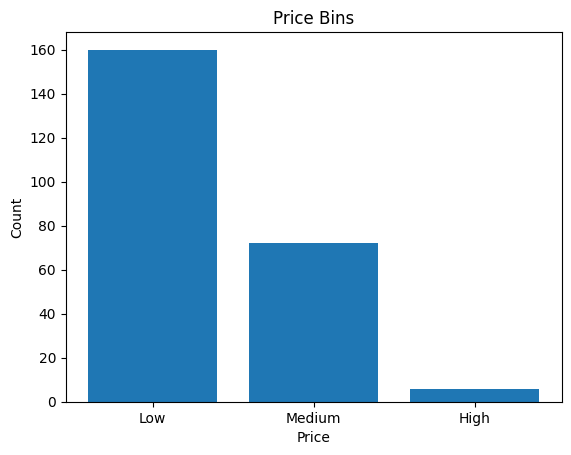

In [60]:
plt.bar(attributes, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

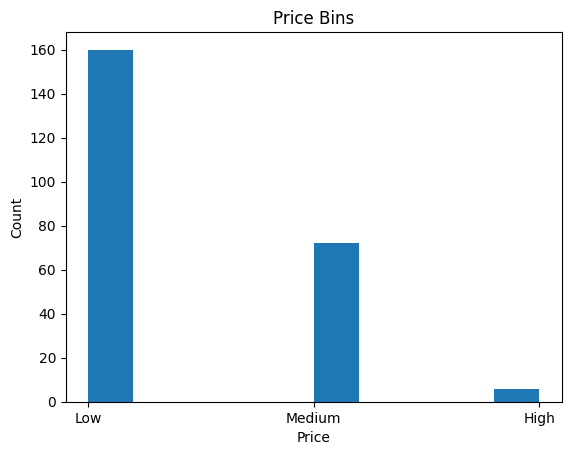

In [61]:
plt.hist(df['Price-binned'], histtype='bar', rwidth=50)  # Histogram for price-binned

# Adding titles and labels
plt.title('Price Bins')  # Title of the plot
plt.xlabel('Price')  # X-axis label
plt.ylabel('Count')  # Y-axis label

# Show the plot
plt.show()

In [62]:
# Write your code below and press Shift+Enter to execute

#we create the categories with pandas dummies
dummy_screen = pd.get_dummies(df['Screen'])

#we rename the categorie columns directly in the dataframe
df.rename(columns={'Screen-IPS_panel':'Screen-IPS_panel','Screeb-Full_HD':'Screen-Full_HD'},inplace=True)

#we add the columns in the dataframe
df = pd.concat([df,dummy_screen],axis=1)

#we remove the screen column
df.drop("Screen",axis=1,inplace=True)

In [63]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Full HD,IPS Panel
0,0,Acer,4,2,1,5,0.336351,0.551724,8,256,83.399405,978,Low,False,True
1,1,Dell,3,1,1,3,0.374754,0.689655,4,256,114.674182,634,Low,True,False
2,2,Dell,3,1,1,7,0.374754,0.931034,8,256,114.674182,946,Low,True,False
3,3,Dell,4,2,1,5,0.319515,0.551724,8,128,63.592046,1244,Low,False,True
4,4,HP,4,2,1,7,0.374754,0.620690,8,256,99.558040,837,Low,True,False
